# Pra Proses Data

tahapan pra proses data untuk membaca gambar dan data dari Kode QR yang akan di proses

## Import Liblary dan Modul

In [ ]:
!pip install pyzbar
!apt install libzbar0
!pip install -U memory_profiler

import os
import cv2
import time
import copy
import random
import numpy as np
from PIL import Image
import memory_profiler
import pyzbar.pyzbar as pyzbar
from google.colab import files
from pyzbar.pyzbar import decode
from skimage import img_as_ubyte
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4l-0 amd64 1.18.0-2build1 [41.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libzbar0 amd64 0.23-1.3 [119 kB]
Fetched 238 kB in 1s (300 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack ...

## Import Gambar

Tahapan mengambil data gambar untuk di proses

File 'kode_qr.png' belum ada pada direktori sesi. Silahkan Upload.


Saving qr_code.png to qr_code.png
Kode QR :


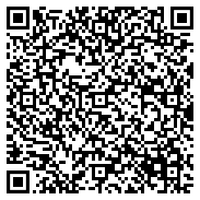

In [ ]:
if os.path.exists("qr_code.png"):
    print("File 'kode_qr.png' sudah ada pada direktori sesi.")
    kode_qr = cv2.imread('qr_code.png')
    print("Kode QR :")
    cv2_imshow(kode_qr)
else:
    print("File 'kode_qr.png' belum ada pada direktori sesi. Silahkan Upload.")
    uploaded = files.upload()

    for qr_code in uploaded.keys():
      image_kode_qr = qr_code

    kode_qr = Image.open(image_kode_qr)

    print("Kode QR :")
    kode_qr.show()

## Read Data Gambar

Tahapan untuk membaca data dari gambar Kode QR

In [ ]:
qr_image = cv2.imread('qr_code.png')
decoded_data = decode(qr_image)

for data in decoded_data:
    print('1. Data:\n', data.data.decode('utf-8'))
    print('\n2. Ukuran matriks:', data.rect.width)

img = Image.open('qr_code.png')
img_arr = np.array(img)
max_pixel = np.max(img_arr)

1. Data:
 ////////////////////////////////////////////////////////////

- THIS CONTAIN INFORMATION -

######## PIXEL : 200  ######## 

- INSIDE DATA QR CODE -

////////////////////////////////////////////////////////////

2. Ukuran matriks: 187


# Algoritma untuk pemetaan nilai skala abu-abu

tahap ini dilakukan untuk pemetaan nilai pixel RGB menjadi sebuah gray image

In [ ]:
img_split = qr_image
gray_img = cv2.cvtColor(img_split, cv2.COLOR_BGR2GRAY)

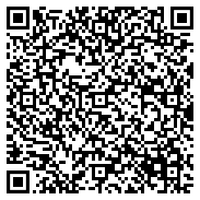

1 data detected.
Type: QRCODE, Data:
 ////////////////////////////////////////////////////////////

- THIS CONTAIN INFORMATION -

######## PIXEL : 200  ######## 

- INSIDE DATA QR CODE -

////////////////////////////////////////////////////////////


In [ ]:
gray_img = gray_img
gray_img_save = Image.fromarray(gray_img)
gray_img_save.save('gray.png')
cv2_imshow(gray_img)
decoded_data = pyzbar.decode(gray_img.astype(int))
if len(decoded_data) == 0:
    print("QR code is not detected or unable to read data.")
else:
    print(f"{len(decoded_data)} data detected.")
    for data in decoded_data:
        print(f"Type: {data.type}, Data:\n {data.data.decode('utf-8')}")

#Algoritma Generate Matriks Shared

### Input Nilai n Share

In [ ]:
n = 2

## Get pixel value

In [ ]:
array_pixel = gray_img.astype(int)
array_temp_p = gray_img.astype(int)
array_temp_b = gray_img.astype(int)
array_pixel
print('Matriks Desimal Gambar : \n\n',array_pixel)

Matriks Desimal Gambar : 

 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


##Binary Conversion

In [ ]:
def konversi_biner(kbin):
  decimal_num = kbin
  binary_num = " "
  divide_num = kbin

  for i in range(decimal_num):
    quotient = divide_num / 2
    quotient = int(quotient)
    remainder = divide_num - (quotient * 2)
    binary_num = binary_num + str(remainder)
    divide_num = quotient

    if quotient == 0:
      break

  rev_num = binary_num[::-1]
  rev_num = rev_num.zfill(8)

  return rev_num

In [ ]:
array_biner = []
wid = array_pixel.shape[0]
len = array_pixel.shape[1]
for i in range(wid):
  for j in range(len):
    des = array_pixel[i][j]
    array_biner.append(konversi_biner(des))

for i in range (wid * len):
  array_biner[i] = array_biner[i].zfill(9)
  array_biner[i] = array_biner[i][:-1]

In [ ]:
array_biner = np.reshape(array_biner, (wid, len))
print('Matriks Binary Gambar : \n\n',array_biner)

Matriks Binary Gambar : 

 [['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ...
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']]


## Get Probability Vector

In [ ]:
v1 = (2**(n-1))-1
v2 = 2**(n-1)
b = 1/(2**(n-1))
prob_int_v = 0
prob_vector = []
prob_int_vector = []

for i in range(v1+1):
  prob_vector.append(b)

for i in range (v2+1):
  prob_int_v = prob_int_v
  prob_int_vector.append(prob_int_v)
  prob_int_v = prob_int_v + b

print("probability vector : ", prob_vector)
print("probability interval vector : ", prob_int_vector)

probability vector :  [0.5, 0.5]
probability interval vector :  [0, 0.5, 1.0]


## Mapping Matriks

In [ ]:
e = (2**n)-1
mapping_matrix = []
mapping_matrix_bin = []

for i in range (e+1):
  mapping_matrix.append(i)
  mapping_matrix_bin.append(konversi_biner(i))
  mapping_matrix_bin[i] = mapping_matrix_bin[i].zfill(9)
  mapping_matrix_bin[i] = mapping_matrix_bin[i][:-1]

print('Decimal : ', mapping_matrix)
print('Binary : ', mapping_matrix_bin)

Decimal :  [0, 1, 2, 3]
Binary :  ['00000000', '00000001', '00000010', '00000011']


In [ ]:
abc = 0
temp = 0
mapping = []
m0 = []
m1 = []
m0_bin = []
m1_bin = []

for i in range (e+1):
  for j in range (8):
    if mapping_matrix_bin[i][j] == '1':
      temp = temp + 1
    else:
      temp = temp + 0
  print(mapping_matrix_bin[i], '* (', mapping_matrix_bin[e],')T')
  abc = abc + temp
  print('= ',temp, 'mod 2')
  mod = temp % 2
  print('= ', mod)
  mapping.append(mod)
  temp = 0

print('\nMapping', mapping)

for i in range (e+1):
  if mapping[i] == 0:
    m0.append(i)
    m0_bin.append(konversi_biner(i))
  else:
    m1.append(i)
    m1_bin.append(konversi_biner(i))

m_len = int((e+1)/2)

for i in range (m_len):
    m0_bin[i] = m0_bin[i].zfill(9)
    m1_bin[i] = m1_bin[i].zfill(9)
    m0_bin[i] = m0_bin[i][-n-1:-1]
    m1_bin[i] = m1_bin[i][-n-1:-1]

print('M0 : ',m0,'\nM1 : ',m1)
print('M0 : ',m0_bin,'\nM1 : ',m1_bin)


00000000 * ( 00000011 )T
=  0 mod 2
=  0
00000001 * ( 00000011 )T
=  1 mod 2
=  1
00000010 * ( 00000011 )T
=  1 mod 2
=  1
00000011 * ( 00000011 )T
=  2 mod 2
=  0

Mapping [0, 1, 1, 0]
M0 :  [0, 3] 
M1 :  [1, 2]
M0 :  ['00', '11'] 
M1 :  ['01', '10']


## Generate Random Probability Number

In [ ]:
array_random_number = copy.deepcopy(array_biner)

for i in range(wid):
  for j in range(len):
    random_nums = [random.randint(1, 9) for i in range(8)]
    random_string = ''.join(map(str, random_nums))
    array_random_number[i][j] = random_string

print('Matriks Random Probability Number : \n\n',array_random_number)

Matriks Random Probability Number : 

 [['17899541' '82743613' '12857344' ... '87369282' '73571921' '25527559']
 ['98155779' '22387453' '33598238' ... '57231785' '74992773' '15912121']
 ['27978833' '67666459' '59157486' ... '75923129' '86126386' '52247772']
 ...
 ['33927661' '51667963' '84437412' ... '43835399' '77911583' '48954129']
 ['32625694' '67864373' '48925639' ... '18276621' '56772616' '95519221']
 ['15498156' '82614261' '95119436' ... '12679148' '36993523' '64114972']]


#Algoritma Encryption dan Decryption

## Efficient XOR image Encryption dan Decryption

###Inisialisasi Variable

In [ ]:
sharing0 = copy.deepcopy(array_biner)
sharing1 = copy.deepcopy(array_biner)
sharing2 = copy.deepcopy(array_biner)
sharing3 = copy.deepcopy(array_biner)
sharing4 = copy.deepcopy(array_biner)
sharing5 = copy.deepcopy(array_biner)
sharing6 = copy.deepcopy(array_biner)
sharing7 = copy.deepcopy(array_biner)

share0 = copy.deepcopy(array_biner)
share1 = copy.deepcopy(array_biner)
share2 = copy.deepcopy(array_biner)
share3 = copy.deepcopy(array_biner)
share4 = copy.deepcopy(array_biner)
share5 = copy.deepcopy(array_biner)
share6 = copy.deepcopy(array_biner)
share7 = copy.deepcopy(array_biner)

recovery_xor_bin = copy.deepcopy(array_biner)
recovery_xor_dec = copy.deepcopy(array_biner)

###Source Code Utama

In [ ]:
start_time_xor = time.time()
def prob_vector(prob):
  for x in range(v2+1):
    if prob == 0:
      probpim = 0
      break
    if prob < prob_int_vector[x]:
      probpim = prob_int_vector[x-1]
      for y in range (v2+1):
        if probpim == prob_int_vector[y]:
          probpim = y
          break
      break

  return probpim

def join(array_share):
  join_string = ''.join(map(str, array_share))

  return join_string

def to_dec(biner):
  decimal = int(biner, 2)

  return decimal

def xor_count(xor1, xor2):
  result = bool(xor1) ^ bool(xor2)

  return result

#Encrypt

for i in range(wid):
  for j in range(len):
    for x in range(n):
      var_arr_share = "array_share{}".format(x)
      globals()[var_arr_share] = []
    for k in range(8):
      alpha = array_biner[i][j][k]
      pim = array_random_number[i][j][k]
      pim = int(pim)
      pim = pim/10
      probpim = prob_vector(pim)

      if alpha == '0':
        share = m0_bin[probpim]
      if alpha == '1':
        share = m1_bin[probpim]

      for y in range(n):
        var_arr_share = "array_share{}".format(y)
        globals()[var_arr_share].append(share[y])

    for z in range(n):
      var_arr_share = "array_share{}".format(z)
      var_sharing = "sharing{}".format(z)

      globals()[var_sharing][i][j] = join(globals()[var_arr_share])

for i in range(wid):
  for j in range(len):
    for k in range(n):
      var_sharing = "sharing{}".format(k)
      var_share = "share{}".format(k)
      share_dec = globals()[var_sharing][i][j]
      globals()[var_share][i][j] = to_dec(share_dec)

for i in range(n):
  globals()[f'share{i}'] = globals()[f'share{i}'].astype(np.uint8)
  xor_share_img = Image.fromarray(img_as_ubyte(globals()[f'share{i}']))
  xor_share_img.save('share_xor{}.png'.format(i+1))

#Decrypt

for i in range(wid):
  for j in range(len):
    array_recovery = []
    for k in range(8):
      xor_temp = []
      for x in range(n):
        xor_temp.append(globals()[f'sharing{x}'][i][j][k])
      xor = bool(int(xor_temp[0]))
      for y in range(1,n):
        xor ^= bool(int(xor_temp[y]))
      array_recovery.append(int(xor))
    recovery_xor_bin[i][j] = join(array_recovery)
    recovery_xor_dec[i][j] = to_dec(recovery_xor_bin[i][j])

recovery_xor_dec = recovery_xor_dec.astype(np.uint8)
recovery_xor = Image.fromarray(img_as_ubyte(recovery_xor_dec))
recovery_xor.save('recovery_xor.png')
end_time_xor = time.time()

print(f"Waktu eksekusi: {end_time_xor - start_time_xor} detik")
mem_usage_xor = memory_profiler.memory_usage()[0]
print(f"Penggunaan memori: {mem_usage_xor} MB")
time_xor = end_time_xor - start_time_xor

Waktu eksekusi: 2.9575374126434326 detik
Penggunaan memori: 160.63671875 MB


###Analisis Hasil

Pemetaan Matriks Share dalam bentuk biner dan desimal

In [ ]:
for i in range(n):
  print('\nMatriks Biner Share XoR {} : \n\n'.format(i+1),globals()[f'sharing{i}'])

for i in range(n):
  print('\nMatriks Desimal Share XoR {} : \n\n'.format(i),globals()[f'share{i}'])


Matriks Biner Share XoR 1 : 

 [['01111100' '10100100' '00111000' ... '11011010' '10110100' '01101111']
 ['11011111' '00011010' '00111001' ... '11000111' '10110110' '01100000']
 ['01111100' '11111011' '11011011' ... '11100001' '11001011' '10001110']
 ...
 ['00101110' '10111110' '10001000' ... '00101011' '11100110' '01110001']
 ['00101110' '11110010' '01101101' ... '01011100' '11110101' '11101000']
 ['01011011' '10100010' '11001001' ... '00111001' '01110100' '10000110']]

Matriks Biner Share XoR 2 : 

 [['10000011' '01011011' '11000111' ... '00100101' '01001011' '10010000']
 ['00100000' '11100101' '11000110' ... '00111000' '01001001' '10011111']
 ['10000011' '00000100' '00100100' ... '00011110' '00110100' '01110001']
 ...
 ['11010001' '01000001' '01110111' ... '11010100' '00011001' '10001110']
 ['11010001' '00001101' '10010010' ... '10100011' '00001010' '00010111']
 ['10100100' '01011101' '00110110' ... '11000110' '10001011' '01111001']]

Matriks Desimal Share XoR 0 : 

 [[124 164  56 

Pemetaan matriks hasil XoR dari Share dalam bentuk biner dan desimal

In [ ]:
print('Matriks Biner Recovery XoR : \n\n',recovery_xor_bin)
print('\nMatriks Desimal Recovery XoR : \n\n',recovery_xor_dec)

Matriks Biner Recovery XoR : 

 [['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ...
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']
 ['11111111' '11111111' '11111111' ... '11111111' '11111111' '11111111']]

Matriks Desimal Recovery XoR : 

 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Gambar hasil algoritma XoR dari tahap awal sampai akhir


Gambar Asli : 



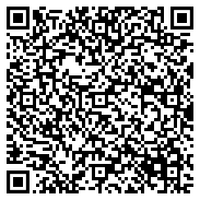


Gambar Gray : 



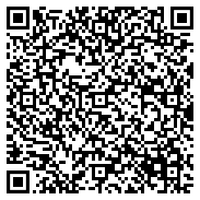


Gambar Share 1 : 



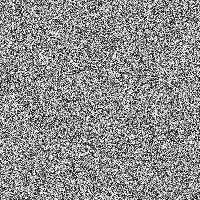


Gambar Share 2 : 



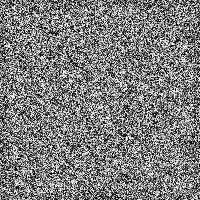


Gambar Recovery : 



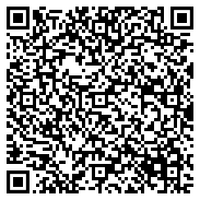

In [ ]:
gambar_asli = cv2.imread('qr_code.png')

for i in range(n):
  var_gambar_xor = "gambar_share{}".format(i+1)
  globals()[var_gambar_xor] = cv2.imread('share_xor{}.png'.format(i+1))
gambar_recovery_xor = cv2.imread('recovery_xor.png')

print('\nGambar Asli : \n')
cv2_imshow(gambar_asli)
print('\nGambar Gray : \n')
cv2_imshow(gray_img)

for i in range(n):
  print('\nGambar Share {} : \n'.format(i+1))
  cv2_imshow(globals()[f'gambar_share{i+1}'])

print('\nGambar Recovery : \n')
cv2_imshow(gambar_recovery_xor)

Hasil Performance Analisis

In [ ]:
print('Waktu Eksekusi (TC) dengan nilai n = ', n, ' adalah ',time_xor, 'detik')
print('Performance memory (SC) dari nilai n = ', n, ' adalah ',mem_usage_xor, 'MB')

Waktu Eksekusi (TC) dengan nilai n =  2  adalah  2.9575374126434326 detik
Performance memory (SC) dari nilai n =  2  adalah  160.63671875 MB


##  Modular Arithmetic Image Encryption dan Decryption

### Inisialisasi Variable

In [ ]:
nilai_modulo = 256
nilai_kunci_mod = 17

random_key_mod = np.random.randint(1, 255, size=(n, wid, len))
share_mod = copy.deepcopy(random_key_mod)
recovery_mod = copy.deepcopy(array_pixel)

#random_key_mod[i][j][k]

### Source Code Utama

In [ ]:
start_time_mod = time.time()
#Encrypt

for i in range(n):
  for j in range(len):
    for k in range(wid):
      pixel_mod = array_pixel[j][k]
      result_mod = (pixel_mod + random_key_mod[i][j][k]) % nilai_modulo
      share_mod[i][j][k] = result_mod

for i in range(n):
  mod_share_img = Image.fromarray(img_as_ubyte(share_mod[i]))
  mod_share_img.save('share_mod{}.png'.format(i+1))

#Decrypt

for i in range(n):
  for j in range(len):
    for k in range(wid):
      cal_mod = share_mod[i][j][k]
      rec_mod = (cal_mod - random_key_mod[i][j][k] + nilai_modulo) % nilai_modulo
      recovery_mod[j][k] = rec_mod

rec_mod_img = Image.fromarray(img_as_ubyte(recovery_mod))
rec_mod_img.save('recovery_mod.png')
end_time_mod = time.time()

print(f"Waktu eksekusi: {end_time_mod - start_time_mod} detik")
mem_usage_mod = memory_profiler.memory_usage()[0]
print(f"Penggunaan memori: {mem_usage_mod} MB")
time_mod = end_time_mod - start_time_mod

/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:541: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


Waktu eksekusi: 0.2955660820007324 detik
Penggunaan memori: 160.890625 MB


In [ ]:
rec_mod

255

### Analisis Hasil

Pemetaan Matriks Random Key, Share, dan Recovery

In [ ]:
print('Random Key Mod : \n')
print(random_key_mod)
print('\nShare Mod : \n')
print(share_mod)
print('\nRecovery Mod : \n')
print(recovery_mod)

Random Key Mod : 

[[[231 166  11 ...  71 229  45]
  [ 21 128 228 ... 125 170 231]
  [172 118 197 ... 113 232 219]
  ...
  [  6 179 123 ... 114  99 112]
  [218  49  97 ...  89 124 180]
  [250 165   7 ... 125 211  55]]

 [[216  39 177 ... 123   4 131]
  [211  44  35 ... 160 135 192]
  [228 119 131 ... 191 115 184]
  ...
  [204  52  97 ... 165 223 125]
  [135 185  89 ... 222  21  16]
  [ 92  50 136 ... 219   4 114]]]

Share Mod : 

[[[230 165  10 ...  70 228  44]
  [ 20 127 227 ... 124 169 230]
  [171 117 196 ... 112 231 218]
  ...
  [  5 178 122 ... 113  98 111]
  [217  48  96 ...  88 123 179]
  [249 164   6 ... 124 210  54]]

 [[215  38 176 ... 122   3 130]
  [210  43  34 ... 159 134 191]
  [227 118 130 ... 190 114 183]
  ...
  [203  51  96 ... 164 222 124]
  [134 184  88 ... 221  20  15]
  [ 91  49 135 ... 218   3 113]]]

Recovery Mod : 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 2

Gambar hasil algoritma Modular dari tahap awal sampai akhir


Gambar Asli : 



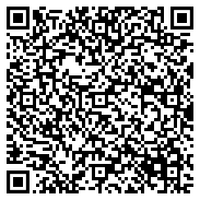


Gambar Gray : 



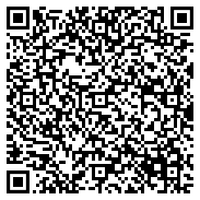


Gambar Share 1 : 



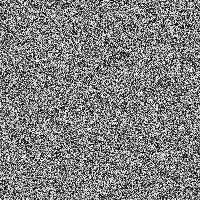


Gambar Share 2 : 



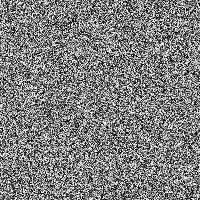


Gambar Recovery : 



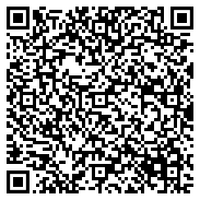

In [ ]:
gambar_asli = cv2.imread('qr_code.png')

for i in range(n):
  var_gambar_mod = "gambar_share{}".format(i+1)
  globals()[var_gambar_mod] = cv2.imread('share_mod{}.png'.format(i+1))
gambar_recovery_mod = cv2.imread('recovery_mod.png')

print('\nGambar Asli : \n')
cv2_imshow(gambar_asli)
print('\nGambar Gray : \n')
cv2_imshow(gray_img)

for i in range(n):
  print('\nGambar Share {} : \n'.format(i+1))
  cv2_imshow(globals()[f'gambar_share{i+1}'])

print('\nGambar Recovery : \n')
cv2_imshow(gambar_recovery_mod)

Hasil Performance Analisis

In [ ]:
print('Waktu Eksekusi (TC) dengan nilai n = ', n, ' adalah ',time_mod, 'detik')
print('Performance memory (SC) dari nilai n = ', n, ' adalah ',mem_usage_mod, 'MB')

Waktu Eksekusi (TC) dengan nilai n =  2  adalah  0.2955660820007324 detik
Performance memory (SC) dari nilai n =  2  adalah  160.890625 MB


#Hasil Percobaan

In [ ]:
from pyzbar import pyzbar
from PIL import Image

qr_asli = cv2.imread('qr_code.png')
decoded_data_asli = decode(qr_asli)

gambar_rekonstruksi_xor = cv2.imread('recovery_xor.png')
decoded_data_xor = decode(gambar_rekonstruksi_xor)

gambar_rekonstruksi_mod = cv2.imread('recovery_mod.png')
decoded_data_mod = decode(gambar_rekonstruksi_mod)

print("* Decode Data Original QR Code : \n")

for data in decoded_data_asli:
        print(f"Type: {data.type}, Data:\n\n {data.data.decode('utf-8')}\n")

print("* Decode Data Recovery by XoR QR Code : \n")

for data in decoded_data_xor:
        print(f"Type: {data.type}, Data:\n\n {data.data.decode('utf-8')}\n")

print("* Decode Data Recovery by Modular QR Code : \n")

for data in decoded_data_mod:
        print(f"Type: {data.type}, Data:\n\n {data.data.decode('utf-8')}\n")

if decoded_data_asli == decoded_data_xor == decoded_data_mod:
    print("* Isi dari kode QR sama, tidak ada perbedaan dari dari gambar asli dan recovery baik metode Xor atau Modular *")
else:
    print("* Isi dari kode QR berbeda, terdapat perbedaan dari salah satu metode *")


* Decode Data Original QR Code : 

Type: QRCODE, Data:

 ////////////////////////////////////////////////////////////

- THIS CONTAIN INFORMATION -

######## PIXEL : 200  ######## 

- INSIDE DATA QR CODE -

////////////////////////////////////////////////////////////

* Decode Data Recovery by XoR QR Code : 

Type: QRCODE, Data:

 ////////////////////////////////////////////////////////////

- THIS CONTAIN INFORMATION -

######## PIXEL : 200  ######## 

- INSIDE DATA QR CODE -

////////////////////////////////////////////////////////////

* Decode Data Recovery by Modular QR Code : 

Type: QRCODE, Data:

 ////////////////////////////////////////////////////////////

- THIS CONTAIN INFORMATION -

######## PIXEL : 200  ######## 

- INSIDE DATA QR CODE -

////////////////////////////////////////////////////////////

* Isi dari kode QR sama, tidak ada perbedaan dari dari gambar asli dan recovery baik metode Xor atau Modular *


In [ ]:
lsb = cv2.imread('e1.png')
lsb = cv2.cvtColor(lsb, cv2.COLOR_BGR2GRAY)
lsb

array([[124,  64, 148, ..., 104, 102, 112],
       [183, 160,  83, ..., 140, 166,  88],
       [ 66,  11, 104, ..., 116, 102, 106],
       ...,
       [186,  54,  46, ..., 100, 126,  68],
       [156, 129,  32, ..., 152, 150, 145],
       [136, 135, 166, ..., 137, 158, 155]], dtype=uint8)

In [ ]:
import numpy as np

# Contoh array
array = lsb

# Menyimpan array ke dalam file teks
np.savetxt('array.txt', array, fmt='%d')

In [ ]:
!pip install stegano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
import stegano

def hide_message(image_path, message_file, output_image):
    try:
        secret_image = stegano.lsb.hide(image_path, message_file)
        secret_image.save(output_image)
        print("Pesan berhasil disisipkan dalam gambar.")
    except stegano.exceptions.SteganoException:
        print("Gagal menyembunyikan pesan dalam gambar.")

def extract_message(image_path, output_file):
    try:
        message = stegano.lsb.reveal(image_path)
        with open(output_file, 'w') as file:
            file.write(message)
        print("Pesan berhasil diekstrak.")
    except stegano.exceptions.SteganoException:
        print("Tidak ada pesan yang dapat diekstrak dari gambar.")

# Contoh penggunaan
image_path = 'carrier_qr_code.png'
message_file = 'array.txt'
output_image = 'gambar_dengan_pesan.png'
output_file = 'pesan_tersembunyi.txt'
with open(message_file, 'r') as file:
    message_file = file.read()
# Menyembunyikan pesan dalam gambar
hide_message(image_path, message_file, output_image)

# Mengekstrak pesan dari gambar
extract_message(output_image, output_file)


Pesan berhasil disisipkan dalam gambar.
Pesan berhasil diekstrak.


In [ ]:
import cv2
import numpy as np

def calculate_psnr(img1, img2):
    # Load the images
    image1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)

    # Calculate the Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)

    # Calculate the maximum pixel value
    max_pixel = 255 if image1.dtype == np.uint8 else 65535

    # Check for zero MSE
    if mse == 0:
        return 99.9  # Set PSNR to a maximum value (e.g., 99 dB) when MSE is zero

    # Calculate the PSNR
    psnr = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr

# Example usage
image_path1 = 'carrier_qr_code.png'
image_path2 = 'gambar_dengan_pesan.png'

psnr_score = calculate_psnr(image_path1, image_path2)
print("PSNR Score:", psnr_score, "dB")

PSNR Score: 55.36060352783895 dB


In [ ]:
import cv2
import numpy as np
from skimage.metrics import mean_squared_error, structural_similarity

def compare_images(img1, img2):
    # Load the images
    image1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(image1, image2)

    # Calculate Structural Similarity Index (SSIM)
    ssim = structural_similarity(image1, image2)

    return mse, ssim

# Example usage
image_path1 = 'carrier_qr_code.png'
image_path_share = 'gambar_dengan_pesan.png'

mse_score, ssim_score = compare_images(image_path1, image_path_share)
print("MSE Score:", mse_score)
print("SSIM Score:", ssim_score)

MSE Score: 0.18924308015217106
SSIM Score: 0.999886252362636


In [ ]:
import cv2
import numpy as np
from skimage.metrics import mean_squared_error, structural_similarity

def compare_images(img1, img2):
    # Load the images
    image1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(image1, image2)

    # Calculate Structural Similarity Index (SSIM)
    ssim = structural_similarity(image1, image2)

    # Convert MSE and SSIM to percentage scores
    mse_score = (1 - (mse / (255 ** 2))) * 100
    ssim_score = ssim * 100

    return mse_score, ssim_score

# Example usage
image_path1 = 'qr_code.png'
image_path_share = 'result 200.png'

mse_score, ssim_score = compare_images(image_path1, image_path_share)
print("MSE Score: {}%".format(mse_score))
print("SSIM Score: {:.2f}%".format(ssim_score))

MSE Score: 84.21086608996539%
SSIM Score: 52.90%


In [ ]:
import math

entropy_score = 0

def entropy(image):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    probabilities = histogram / np.sum(histogram)
    entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))

    return entropy_value

for i in range(n):
  image = cv2.imread('b.png')
  entropy_score = entropy_score + entropy(image)

entropy_score = entropy_score / n
print("Avg Entropi Score:", entropy_score)


Avg Entropi Score: 7.995091915130615


In [ ]:
import numpy as np

# Membaca array dari file teks
array = np.loadtxt('pesan_tersembunyi.txt', dtype=int)

# Menampilkan array
print(array)

In [ ]:
simpan_img = Image.fromarray(img_as_ubyte(array))
simpan_img.save('abc.png')

In [ ]:
from pyzbar import pyzbar
from PIL import Image

cqr = cv2.imread('carrier_qr_code.png')
decoded_cqr = decode(cqr)

stg_qr = cv2.imread('gambar_dengan_pesan.png')
decoded_stg_qr = decode(stg_qr)

print("* Decode Data Carrier QR Code : \n")

for data in decoded_cqr:
        print(f"Type: {data.type}, Data:\n\n {data.data.decode('utf-8')}\n")

print("* Decode Hide Data after Steganography QR Code : \n")

for data in decoded_stg_qr:
        print(f"Type: {data.type}, Data:\n\n {data.data.decode('utf-8')}\n")